In [ ]:
!gdown --id 1lyMMb_3H4VT8mDhppC-CjZWC8Pc9LeTI -q
!unzip -q nlp_lab2.zip
!pip install -r requirements.txt -q

     |████████████████████████████████| 133kB 7.8MB/s 
     |████████████████████████████████| 1.3MB 34.3MB/s 
     |████████████████████████████████| 163kB 50.0MB/s 
     |████████████████████████████████| 143kB 35.1MB/s 
     |████████████████████████████████| 9.8MB 34.3MB/s 
     |████████████████████████████████| 184kB 56.6MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 143kB 58.9MB/s 
     |████████████████████████████████| 102kB 13.5MB/s 
     |████████████████████████████████| 122kB 60.1MB/s 
     |████████████████████████████████| 4.1MB 38.3MB/s 
     |████████████████████████████████| 143kB 57.1MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 143kB 58.9MB/s 
     |████████████████████████████████| 1.5MB 51.2MB/s 
     |████████████████████████████████| 15.3MB 352kB

In [ ]:
import matplotlib.pyplot as plt

import data_preprocessing
import get_bleu_score
import train_pipeline
import utils

import lstm_attention
import GRU_attention
import GRU_only
import baseline

In [ ]:
train_data, valid_data, test_data, SRC, TRG = data_preprocessing.return_preprocessed_data()

# 1 Baseline with more iterations

In [ ]:
baseline_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           baseline.Encoder,
                                           baseline.Decoder, 
                                           baseline.Seq2Seq, 
                                           'Baseline 30 iters',
                                           batch_size=32,
                                           n_iter=30)

1250it [02:04, 10.07it/s]
1250it [02:03, 10.12it/s]
1250it [02:03, 10.16it/s]
1250it [02:03, 10.08it/s]
1250it [02:03, 10.13it/s]
1250it [02:03, 10.13it/s]
1250it [02:03, 10.11it/s]
1250it [02:03, 10.11it/s]
1250it [02:03, 10.13it/s]
1250it [02:03, 10.12it/s]
1250it [02:03, 10.14it/s]
1250it [02:03, 10.08it/s]
1250it [02:03, 10.11it/s]
1250it [02:04, 10.07it/s]
1250it [02:03, 10.14it/s]
1250it [02:03, 10.13it/s]
1250it [02:03, 10.10it/s]
1250it [02:04, 10.07it/s]
1250it [02:03, 10.08it/s]
1250it [02:03, 10.09it/s]
1250it [02:04, 10.05it/s]
1250it [02:03, 10.13it/s]
1250it [02:04, 10.04it/s]
1250it [02:03, 10.10it/s]
1250it [02:03, 10.10it/s]
1250it [02:03, 10.14it/s]
1250it [02:03, 10.16it/s]
1250it [02:03, 10.11it/s]
1250it [02:05, 10.00it/s]
1250it [02:04, 10.00it/s]


In [ ]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(baseline_model, test_iterator, TRG)

In [ ]:
print(bleu_score)

21.65903045271914


In [ ]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: you will find a gift shop at the property .
translated: there is a a souvenir shop .

original: the property offers free parking .
translated: free parking .

original: there is also an electric kettle .
translated: full kitchen with a refrigerator and electric kettle .

original: towels are offered .
translated: also included .

original: bed linen is provided .
translated: linen and a private bathroom .



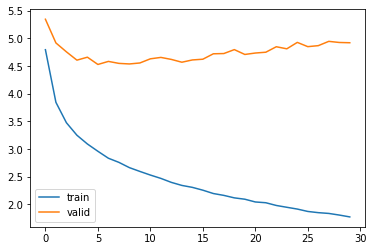

In [ ]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Бейзлайн с увеличенным количеством итераций (30) удалось обучить до BLEU = 21.  
Качестве модели очень среднее.  
Обучение на Colab Pro с карточками Tesla P100 длилось около часа.  
Модель переобучается после 10 итерации.  
В режиме inference модель сможет обрабатывать батч размером 32 за 0.1 секунды.

# 2. Only GRU

In [ ]:
gru_only_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           GRU_only.Encoder,
                                           GRU_only.Decoder, 
                                           GRU_only.Seq2Seq, 
                                           'Baseline 20 iters',
                                           batch_size=32,
                                           n_iter=20)

1250it [01:47, 11.65it/s]
1250it [01:47, 11.67it/s]
1250it [01:45, 11.81it/s]
1250it [01:46, 11.74it/s]
1250it [01:46, 11.75it/s]
1250it [01:46, 11.78it/s]
1250it [01:47, 11.62it/s]
1250it [01:47, 11.62it/s]
1250it [01:46, 11.69it/s]
1250it [01:46, 11.73it/s]
1250it [01:46, 11.69it/s]
1250it [01:46, 11.69it/s]
1250it [01:46, 11.73it/s]
1250it [01:46, 11.71it/s]
1250it [01:46, 11.73it/s]
1250it [01:46, 11.71it/s]
1250it [01:46, 11.74it/s]
1250it [01:46, 11.76it/s]
1250it [01:46, 11.73it/s]
1250it [01:46, 11.71it/s]


In [ ]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(gru_only_model, test_iterator, TRG)
print(bleu_score)

23.445399283386624


In [ ]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: free parking facility is available .
translated: parking is provided .

original: linens are offered .
translated: bed linen is featured .

original: free wifi access is available .
translated: free wi - fi access is available .

original: free wifi access is available .
translated: free wi - fi access is available .

original: the property offers free parking .
translated: parking is provided .



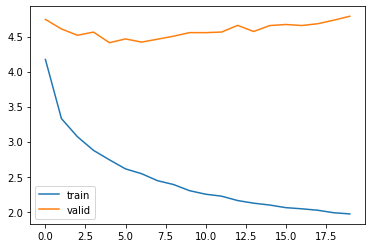

In [ ]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Обычный decoder-encoder на GRU на 20 итерациях удалось обучить до BLEU = 23.44.  
Качестве модели лучше, чем бейзлайн.  
Обучение на Colab Pro с карточками Tesla P100 длилось полчаса (быстрее, чем LSTM baseline, что вполне логично).  
Модель переобучается после 8 итерации.  
В режиме inference модель сможет обрабатывать батч размером 32 за 0.09 секунды.

# 3. GRU with Attention

In [ ]:
gru_attention_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           GRU_attention.Encoder,
                                           GRU_attention.Decoder, 
                                           GRU_attention.Seq2Seq, 
                                           'GRU only 20 iters',
                                           batch_size=32,
                                           n_iter=10)

1250it [02:58,  7.00it/s]
1250it [02:57,  7.02it/s]
1250it [02:57,  7.03it/s]
1250it [02:57,  7.03it/s]
1250it [02:57,  7.04it/s]
1250it [02:58,  7.02it/s]
1250it [02:58,  7.02it/s]
1250it [02:57,  7.03it/s]
1250it [02:58,  6.99it/s]
1250it [02:57,  7.03it/s]


In [ ]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(gru_attention_model, test_iterator, TRG)

In [ ]:
print(bleu_score)

28.092074154958453


In [ ]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: you will find a gift shop at the property .
translated: there is a gift shop at the property .

original: the property offers free parking .
translated: free parking is provided .

original: there is also an electric kettle .
translated: there is an electric kettle .

original: towels are offered .
translated: towels are offered .

original: bed linen is provided .
translated: bed linen is offered .



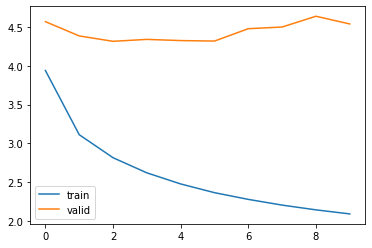

In [ ]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Decoder-encoder GRU c Attention на 10 итерациях показала качество BLEU = 28.04.  
Качестве модели лучше, чем все предыдущие.  
Обучение на Colab Pro с карточками Tesla P100 длилось полчаса.  
Модель переобучается после 5 итерации.  
В режиме inference модель сможет обрабатывать батч размером 32 за 0.14 секунды.

# 4. LSTM with Attention

In [ ]:
lstm_attention_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           lstm_attention.Encoder,
                                           lstm_attention.Decoder, 
                                           lstm_attention.Seq2Seq, 
                                           'LSTM_attention 10 iters',
                                           batch_size=32,
                                           n_iter=10)

1250it [03:20,  6.23it/s]
1250it [03:21,  6.22it/s]
1250it [03:21,  6.19it/s]
1250it [03:22,  6.19it/s]
1250it [03:21,  6.22it/s]
1250it [03:20,  6.22it/s]
1250it [03:20,  6.22it/s]
1250it [03:21,  6.20it/s]
1250it [03:21,  6.19it/s]
1250it [03:21,  6.21it/s]


In [ ]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(lstm_attention_model, test_iterator, TRG)
print(bleu_score)

33.31715717482361


In [ ]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: you will find a gift shop at the property .
translated: there is a souvenir shop at the property .

original: the property offers free parking .
translated: parking is free .

original: there is also an electric kettle .
translated: there is also an electric kettle .

original: towels are offered .
translated: towels are featured .

original: bed linen is provided .
translated: bed linen is featured .



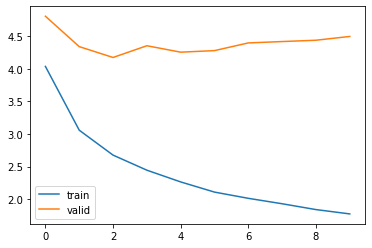

In [ ]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Decoder-encoder LSTM c Attention на 10 итерациях показала качество BLEU = 33.31.  
Качестве модели наилучшее.  
Обучение на Colab Pro с карточками Tesla P100 длилось полчаса.  
Модель переобучается после 5 итерации, но значительно меньше, чем предыдущие модели.  
В режиме inference модель сможет обрабатывать батч размером 32 за 0.14 секунды, как и GRU with Attention

Общие выводы:


*   Удалось выбить максимальное качество BLEU = 33.31 на LSTM with Attention.
*   В целом модели с Attention справляются лучше с задачей перевода, однако, обучаются значительно дольше. Так же снижается переобучение.

